In [53]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

from seqme.utils import random_subset, read_fasta_file
from config_paths import PATHS_FOR_DISCRIMINATIVE_MODELS

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [54]:
a = pd.read_csv(PATHS_FOR_DISCRIMINATIVE_MODELS['CPL-Diff'], sep='\t')
column_names = a.columns.values.tolist()

In [55]:
column_names

['Sequence',
 'ampeppy_Prediction',
 'ampeppy_Probability_score',
 'amplify_Prediction',
 'amplify_Probability_score',
 'ampredmfa_Prediction',
 'ampredmfa_Probability_score',
 'ampscanner_Prediction',
 'ampscanner_Probability_score',
 'hydramp-amp-classifier_Prediction',
 'hydramp-amp-classifier_Probability_score',
 'hydramp-mic-classifier_Prediction',
 'hydramp-mic-classifier_Probability_score',
 'sensexamp-classifier_Prediction',
 'sensexamp-classifier_Probability_score',
 'sensexamp-ecoli_MIC',
 'sensexamp-saureus_MIC',
 'ampredictor_MIC',
 'apex-ecoli_MIC',
 'apex-saureus_MIC',
 'apex-min_MIC',
 'apex-kpneumoniae_MIC',
 'apex-abaumannii_MIC',
 'apex-paeruginosa_MIC',
 'deep-amp-gram+_MIC',
 'deep-amp-gram-_MIC',
 'mbc-attention_MIC']

In [64]:
column_names_mic = [
    # 'sensexamp-ecoli_MIC',
    'apex-ecoli_MIC',
    # 'deep-amp-gram-_MIC',
    'ampredictor_MIC'
]

In [57]:
column_names_predictions = [name for name in column_names if name.endswith('Prediction')]
column_names_predictions.pop(column_names_predictions.index('hydramp-mic-classifier_Prediction'))
column_names_predictions

['ampeppy_Prediction',
 'amplify_Prediction',
 'ampredmfa_Prediction',
 'ampscanner_Prediction',
 'hydramp-amp-classifier_Prediction',
 'sensexamp-classifier_Prediction']

In [58]:
PATHS_FOR_DISCRIMINATIVE_MODELS

{'positives': '/raid/brunopsz/Discriminatory_model_results/results_final/amp_positives_MAX40/battleamp_predictions.tsv',
 'positives_hq': '/raid/brunopsz/Discriminatory_model_results/results_final/amp_positives_hq_MAX40/battleamp_predictions.tsv',
 'negatives': '/raid/brunopsz/Discriminatory_model_results/results_final/amp_negatives_MAX40/battleamp_predictions.tsv',
 'negatives_hq': '/raid/brunopsz/Discriminatory_model_results/results_final/amp_negatives_hq_MAX40/battleamp_predictions.tsv',
 'random_uniform': '/raid/brunopsz/Discriminatory_model_results/results_final/random_amp_uniform_distribution_MAX40/battleamp_predictions.tsv',
 'random_standard': '/raid/brunopsz/Discriminatory_model_results/results_final/random_amp_with_standard_distribution_MAX40/battleamp_predictions.tsv',
 'UniProt': '/raid/brunopsz/Discriminatory_model_results/results_final/uniprot_8_50_100_50K_MAX40/battleamp_predictions.tsv',
 'HydrAMP': '/raid/brunopsz/Discriminatory_model_results/results_final/hydramp_MAX4

In [ ]:
results_unanimous_predictions = {}

for dataset_name, dataset_path in PATHS_FOR_DISCRIMINATIVE_MODELS.items():
    df = pd.read_csv(dataset_path, sep='\t')
    
    df = df[column_names_predictions]
    print(f"Processing dataset: {dataset_name} with {len(df)} entries")
    
    df = df.dropna()
    print(f"After dropping NaNs: {len(df)} entries")
    
    if len(df) == 0:
        results_unanimous_predictions[dataset_name] = 0.0
        continue
    
    unanimous_rows = (df.eq("AMP").all(axis=1))
    percent_unanimous = unanimous_rows.mean() * 100
    print(f"{dataset_name}: {percent_unanimous:.2f}% unanimous AMP predictions \n")
    results_unanimous_predictions[dataset_name] = percent_unanimous


Processing dataset: positives with 14941 entries
After dropping NaNs: 8211 entries
positives: 57.52% unanimous AMP predictions 

Processing dataset: positives_hq with 3322 entries
After dropping NaNs: 2517 entries
positives_hq: 87.72% unanimous AMP predictions 

Processing dataset: negatives with 14814 entries
After dropping NaNs: 8080 entries
negatives: 0.87% unanimous AMP predictions 

Processing dataset: negatives_hq with 925 entries
After dropping NaNs: 738 entries
negatives_hq: 59.21% unanimous AMP predictions 

Processing dataset: random_uniform with 50000 entries
After dropping NaNs: 22328 entries
random_uniform: 3.72% unanimous AMP predictions 

Processing dataset: random_standard with 49997 entries
After dropping NaNs: 27568 entries
random_standard: 9.03% unanimous AMP predictions 

Processing dataset: UniProt with 50000 entries
After dropping NaNs: 8248 entries
UniProt: 3.47% unanimous AMP predictions 

Processing dataset: HydrAMP with 49998 entries
After dropping NaNs: 48736

In [60]:
results_unanimous_predictions

{'positives': np.float64(57.520399464133476),
 'positives_hq': np.float64(87.72348033373063),
 'negatives': np.float64(0.8663366336633664),
 'negatives_hq': np.float64(59.2140921409214),
 'random_uniform': np.float64(3.721784306700107),
 'random_standard': np.float64(9.028583865351132),
 'UniProt': np.float64(3.467507274490786),
 'HydrAMP': np.float64(35.6327971109652),
 'AMP-GAN': np.float64(38.814845908979606),
 'AMP-Diffusion': np.float64(12.418955247483),
 'CPL-Diff': np.float64(81.54546672023571),
 'OmegAMP': np.float64(44.92233787029624),
 'AMP-LM': np.float64(61.98100521095983),
 'AMP-Muller': np.float64(69.09765142150803)}

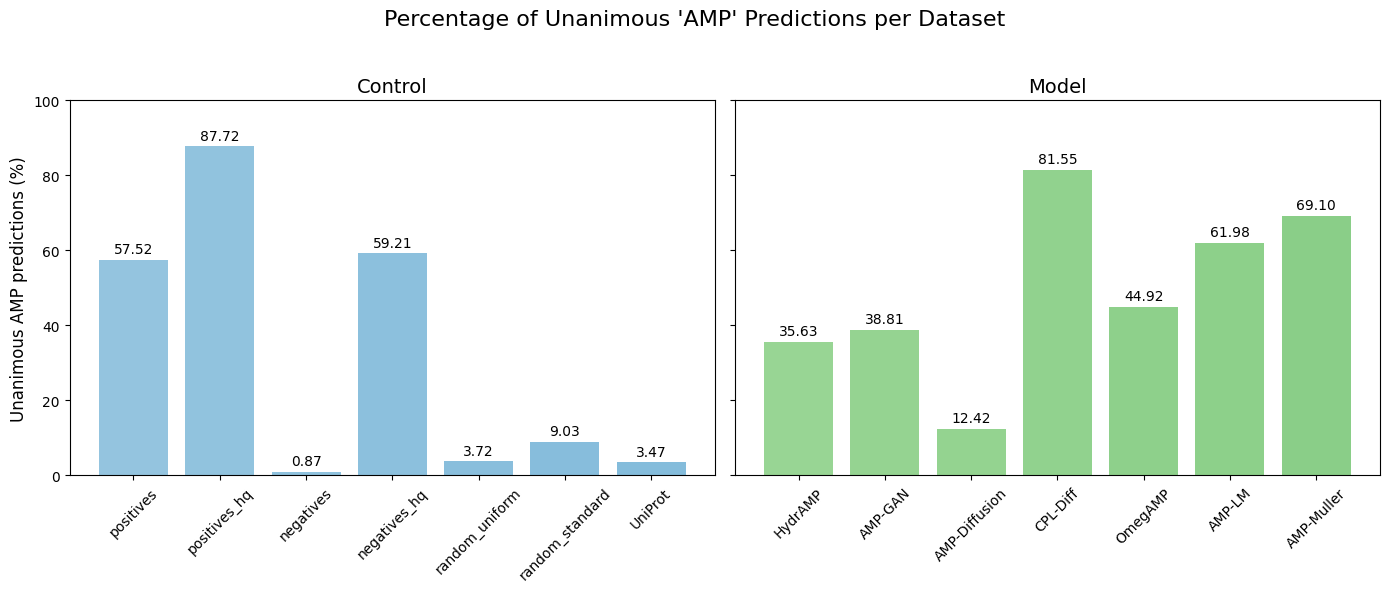

In [61]:
control_keys = list(results_unanimous_predictions.keys())[:7]
model_keys = list(results_unanimous_predictions.keys())[7:]

control_values = [results_unanimous_predictions[k] for k in control_keys]
model_values = [results_unanimous_predictions[k] for k in model_keys]

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

colors_control = plt.cm.Blues(np.linspace(0.4, 0.44, len(control_keys)))
axes[0].bar(control_keys, control_values, color=colors_control)
axes[0].set_title("Control", fontsize=14)
axes[0].set_ylabel("Unanimous AMP predictions (%)", fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_ylim(0, 100)

for i, v in enumerate(control_values):
    axes[0].text(i, v + 1, f"{v:.2f}", ha='center', va='bottom', fontsize=10)

colors_model = plt.cm.Greens(np.linspace(0.4, 0.44, len(model_keys)))
axes[1].bar(model_keys, model_values, color=colors_model)
axes[1].set_title("Model", fontsize=14)
axes[1].tick_params(axis='x', rotation=45)
axes[0].set_ylim(0, 100)

for i, v in enumerate(model_values):
    axes[1].text(i, v + 1, f"{v:.2f}", ha='center', va='bottom', fontsize=10)

fig.suptitle("Percentage of Unanimous 'AMP' Predictions per Dataset", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [41]:
column_names_mic

['sensexamp-ecoli_MIC', 'apex-ecoli_MIC', 'deep-amp-gram-_MIC']

             Tool  Predicted_MIC
0  apex-ecoli_MIC      121.92927
1  apex-ecoli_MIC       33.31833
2  apex-ecoli_MIC      132.16988
3  apex-ecoli_MIC       45.80482
4  apex-ecoli_MIC      118.18884


/tmp/ipykernel_2278251/2361738921.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_melted, x='Tool', y='Predicted_MIC', palette='viridis', inner='box')


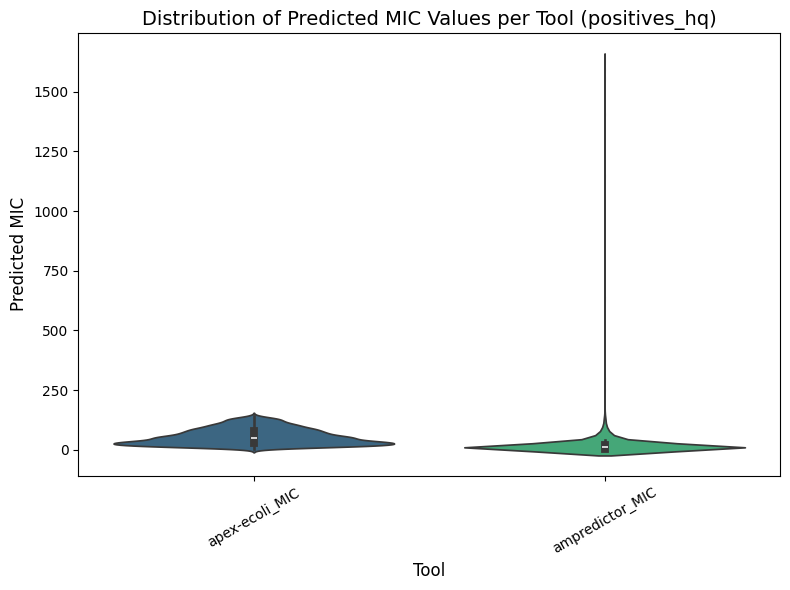

In [ ]:
df = pd.read_csv(PATHS_FOR_DISCRIMINATIVE_MODELS['positives_hq'], sep='\t')

df = df[column_names_mic].dropna()
df_melted = df.melt(var_name='Tool', value_name='Predicted_MIC')
print(df_melted.head())

plt.figure(figsize=(8, 6))
sns.violinplot(data=df_melted, x='Tool', y='Predicted_MIC', palette='viridis', inner='box')
plt.title("Distribution of Predicted MIC Values per Tool (positives_hq)", fontsize=14)
plt.xlabel("Tool", fontsize=12)
plt.ylabel("Predicted MIC", fontsize=12)
plt.xticks(rotation=30)
plt.tight_layout()

plt.show()


In [ ]:
control_keys = list(PATHS_FOR_DISCRIMINATIVE_MODELS.keys())[:7]
model_keys = list(PATHS_FOR_DISCRIMINATIVE_MODELS.keys())[7:]

data = []
for name, path in PATHS_FOR_DISCRIMINATIVE_MODELS.items():
    df = pd.read_csv(path, sep='\t')
    if 'apex-ecoli_MIC' in df.columns:
        mic_values = df['apex-ecoli_MIC'].dropna()
        for val in mic_values:
            data.append({'Dataset': name, 'apex-ecoli_MIC': val})

df_all = pd.DataFrame(data)

/tmp/ipykernel_2278251/960108590.py:4: UserWarning: 
The palette list has fewer values (1) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.violinplot(
/tmp/ipykernel_2278251/960108590.py:15: UserWarning: 
The palette list has fewer values (1) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.violinplot(


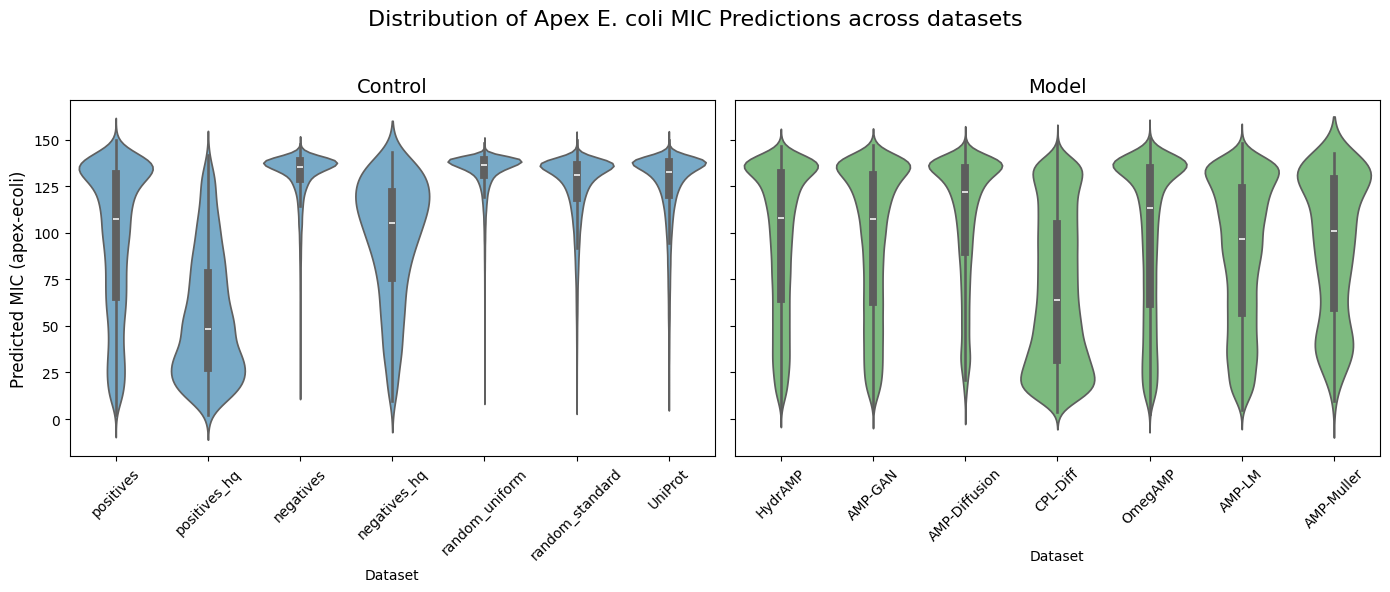

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.violinplot(
    data=df_all[df_all['Dataset'].isin(control_keys)],
    x='Dataset', y='apex-ecoli_MIC', hue='Dataset',
    palette=sns.color_palette("Blues", 1),
    ax=axes[0], inner='box', legend=False
)
axes[0].set_title("Control", fontsize=14)
axes[0].set_ylabel("Predicted MIC (apex-ecoli)", fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

sns.violinplot(
    data=df_all[df_all['Dataset'].isin(model_keys)],
    x='Dataset', y='apex-ecoli_MIC', hue='Dataset',
    palette=sns.color_palette("Greens", 1),
    ax=axes[1], inner='box', legend=False
)
axes[1].set_title("Model", fontsize=14)
axes[1].set_ylabel("")
axes[1].tick_params(axis='x', rotation=45)

fig.suptitle("Distribution of Apex E. coli MIC Predictions across datasets", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [ ]:
control_keys = list(PATHS_FOR_DISCRIMINATIVE_MODELS.keys())[:7]
model_keys = list(PATHS_FOR_DISCRIMINATIVE_MODELS.keys())[7:]

data = []
for name, path in PATHS_FOR_DISCRIMINATIVE_MODELS.items():
    df = pd.read_csv(path, sep='\t')
    if 'ampredictor_MIC' in df.columns:
        mic_values = df['ampredictor_MIC'].dropna()
        for val in mic_values:
            data.append({'Dataset': name, 'ampredictor_MIC': val})

df_all = pd.DataFrame(data)

In [72]:
df_all = df_all[df_all['ampredictor_MIC'] <= 150]

/tmp/ipykernel_2278251/2985628966.py:4: UserWarning: 
The palette list has fewer values (1) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.violinplot(
/tmp/ipykernel_2278251/2985628966.py:15: UserWarning: 
The palette list has fewer values (1) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.violinplot(


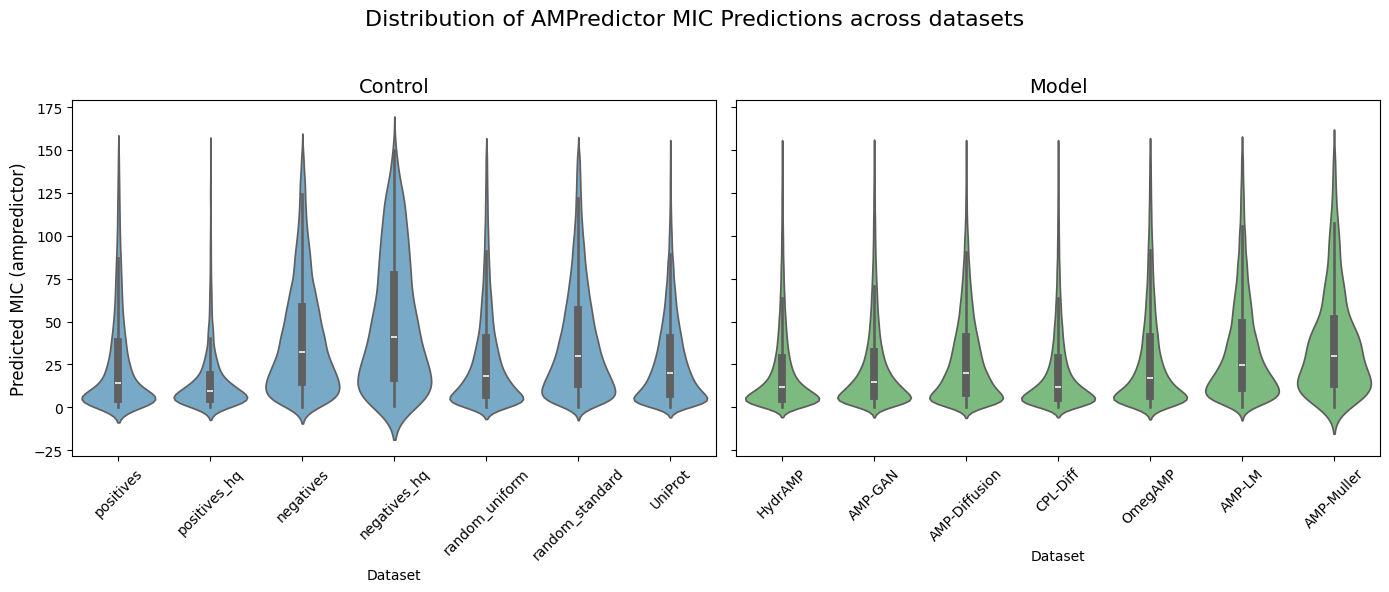

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.violinplot(
    data=df_all[df_all['Dataset'].isin(control_keys)],
    x='Dataset', y='ampredictor_MIC', hue='Dataset',
    palette=sns.color_palette("Blues", 1),
    ax=axes[0], inner='box', legend=False
)
axes[0].set_title("Control", fontsize=14)
axes[0].set_ylabel("Predicted MIC (ampredictor)", fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

sns.violinplot(
    data=df_all[df_all['Dataset'].isin(model_keys)],
    x='Dataset', y='ampredictor_MIC', hue='Dataset',
    palette=sns.color_palette("Greens", 1),
    ax=axes[1], inner='box', legend=False
)
axes[1].set_title("Model", fontsize=14)
axes[1].set_ylabel("")
axes[1].tick_params(axis='x', rotation=45)

fig.suptitle("Distribution of AMPredictor MIC Predictions across datasets", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()